# Half-life Analysis

In [1]:
#!pip install lifelines

In [2]:
from lifelines import KaplanMeierFitter
from lifelines.utils import survival_table_from_events
from lifelines.statistics import logrank_test
from lifelines import NelsonAalenFitter
from lifelines.plotting import add_at_risk_counts
from lifelines import CoxPHFitter
import itertools
import datetime
import json
import hashlib
from pprint import pprint

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from __future__ import print_function
%matplotlib inline

In [4]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

In [5]:
with open("hl_results.json", 'rU') as fd:
    dj = json.load(fd)

In [6]:
df = pd.read_json(dj, orient="columns")

In [7]:
df["MUTATE_PROB"] = pd.to_numeric(df["MUTATE_PROB"].round(decimals=5))

In [8]:
df.head()

ATP  CARRYC           DESCRIPTION      E  MPROB  MUTATE_PROB  \
0       18000    2000  wild type extinction   True  0.001      0.00025   
1       18000    2000  wild type extinction   True  0.001      0.00025   
10      18000    2000  wild type extinction   True  0.001      0.00025   
100     18000    2000  wild type extinction   True  0.001      0.00025   
101  18108000    2000     end of simulation  False  0.001      0.00025   

     NO_MTDNA  NO_SPECIES REPL_TIME  SAMPLE_PER_HOUR     TIME  TOTAL_SPECIES  \
0        1999           2  variable                4   691111            252   
1        1996           4  variable                4   472228            182   
10       1999           4  variable                4   701416            309   
100      2005           5  variable                4  1665318            270   
101      1032           5  variable                4  2452800            262   

     halflife  
0          10  
1          10  
10         10  
100        25  
101        25

In [9]:
sample_per_day = 24 * df['SAMPLE_PER_HOUR'][1]; 

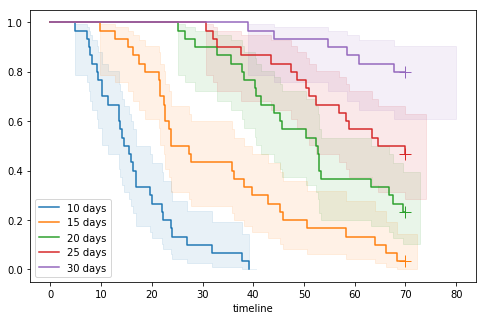

In [10]:
median_life = []
kmf = KaplanMeierFitter()

f = plt.figure(figsize=(8,5))
ax = [f.add_subplot(1, 1, 1)]

for hl in [10,15,20,25,30]:
    
    T = df['TIME'][df.halflife == hl]/float(sample_per_day*365)
    E = df['E'][df.halflife == hl]
    kmf.fit(T, E, alpha=0.95, label="%d days" % (hl))
    ax1 = kmf.plot(ax=ax[-1], show_censors=True, ci_alpha=0.1,  ci_force_lines=False)
    median_life.append(kmf.median_)
    ax.append(ax1)

In [12]:
X_train = np.array([10,15,20,25])
Y_train = np.array(median_life[:4])
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_train,Y_train)

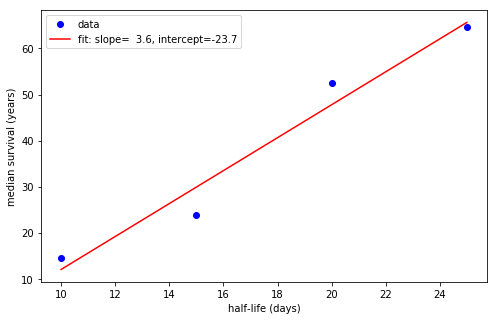

In [13]:
plt.figure(figsize=(8,5))
plt.plot(X_train, Y_train, 'bo', label="data")
plt.plot(X_train, gradient*X_train + intercept, 'r-', label='fit: slope=%5.1f, intercept=%5.1f' % tuple([3.6,-23.7]))
#plt.plot(X_1, func(X_1, *popt), 'r-',  label='fit: a=%5.1f, b=%5.1f, c=%5.1f' % tuple(popt))
plt.ylabel("median survival (years)")
plt.xlabel("half-life (days)")
plt.legend()